## Subset Selection in Python

Here we apply the best subset selection approach to the Hitters data. We wish to predict a baseball player’s
Salary on the basis of various statistics associated with performance in the previous year. 

In [1]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Hitters.csv')
df.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df["Salary"].isnull().sum()

59

In [4]:
# Print the dimensions of the original Hitters data 
df.shape

(322, 21)

In [5]:
# Drop any rows the contain missing values, along with the player's name
df = df.dropna().drop('Player', axis=1)

In [6]:
# Print the dimensions of the modified data
df.shape

(263, 20)

In [7]:
#Now we have no more null values
df["Salary"].isnull().sum()

0

In [8]:
#Convert categorical variable into dummy/indicator variables
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [9]:
#Get the label
y = df.Salary

In [10]:
dummies

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [11]:
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

We will perform best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using RSS. We’ll define a helper function to outputs the best set of variables for each model size

In [12]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

This returns a DataFrame containing the best model that we generated, along with some extra information
about the model. Now we want to call that function for each number of predictors k

In [13]:
def getBest(k): #Number of predictors
    start = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    end = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (end-start), "seconds.")
    # Return the best model, along with some other useful information about the model
    return best_model

In [14]:
models = pd.DataFrame(columns=["RSS", "model"])
for i in range(1,20):
    models.loc[i] = getBest(i)

Processed  19 models on 1 predictors in 0.035578012466430664 seconds.
Processed  171 models on 2 predictors in 0.27361536026000977 seconds.
Processed  969 models on 3 predictors in 1.7020628452301025 seconds.
Processed  3876 models on 4 predictors in 6.510815143585205 seconds.
Processed  11628 models on 5 predictors in 26.759675979614258 seconds.
Processed  27132 models on 6 predictors in 68.43480110168457 seconds.
Processed  50388 models on 7 predictors in 124.92953062057495 seconds.
Processed  75582 models on 8 predictors in 203.67836904525757 seconds.
Processed  92378 models on 9 predictors in 206.4134397506714 seconds.
Processed  92378 models on 10 predictors in 240.0997097492218 seconds.
Processed  75582 models on 11 predictors in 166.77021670341492 seconds.
Processed  50388 models on 12 predictors in 130.73312664031982 seconds.
Processed  27132 models on 13 predictors in 68.54985308647156 seconds.
Processed  11628 models on 14 predictors in 28.550768613815308 seconds.
Processed  

As you can see it's running p (predictors) choose k(desired predictors) number of models. For computation purpose we're not going to run subset selection on all 19 range of predictors.

Now we have one big DataFrame that contains the best models we’ve generated. 

In [15]:
models

,RSS,model
1,4.321393e+07,<statsmodels.regression.linear_model.Regressio...
2,3.073305e+07,<statsmodels.regression.linear_model.Regressio...
3,2.941071e+07,<statsmodels.regression.linear_model.Regressio...
4,2.797678e+07,<statsmodels.regression.linear_model.Regressio...
5,2.718780e+07,<statsmodels.regression.linear_model.Regressio...
6,2.639772e+07,<statsmodels.regression.linear_model.Regressio...
7,2.606413e+07,<statsmodels.regression.linear_model.Regressio...
8,2.548030e+07,<statsmodels.regression.linear_model.Regressio...
9,2.519756e+07,<statsmodels.regression.linear_model.Regressio...
10,2.493515e+07,<statsmodels.regression.linear_model.Regressio...


We can get a full rundown of a single model using the summary() function if we want to access the details of each model

In [16]:
#Model summary for three variables
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              293.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    4.43e-83
Time:                        11:48:06   Log-Likelihood:                         -1901.8
No. Observations:                 263   AIC:                                      3810.
Df Residuals:                     260   BIC:                                      3820.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hits           3.4057      0.288     11.842      0.000       2.839       3.972
CRBI           0.6964      0.065     10.742      0.000       0.569       0.824
Division_W  -129.1604     37.777     -3.419      0.001    -203.548     -54.773
==============================================================================
Omnibus:                      110.025   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.594
Skew:                           1.589   Prob(JB):                    1.05e-135
Kurtosis:                       9.828   Cond. No.                         856.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This output indicates that the best three-variable model contains Hits, CRBI and Division_W. To save time, we
only generated results up to the best four-variable model. You can use the functions we defined above to
explore as many variables as you want.

In addition to the output we get when we print the summary to the screen, fitting the OLS also produced many other useful statistics such as adjusted R square, AIC, and BIC. We can examine these to try to select the best overall model.

Text(0, 0.5, 'AIC')

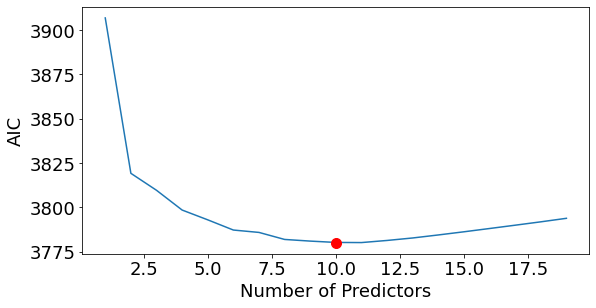

In [17]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

#We're looking for the model with the smallest AIC, we can do the same for BIC 
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('Number of Predictors')
plt.ylabel('AIC')

## Logistic Regression with regularization

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. The key difference between these two is the penalty term.

As mentioned in the lectures Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function while Lasso Regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

Let's use the the breast cancer wisconsin dataset to showcase an example of these concepts in practise

In [18]:
#Imports
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
#Create the Data

# Load the diabetes dataset
breast_cancer = datasets.load_breast_cancer()

df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Create X from the features
X = breast_cancer.data

# Create y from output
y = breast_cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Because the regularization penalty is comprised of the sum of the absolute value of the coefficients, we need to scale the data so the coefficients are all based on the same scale.

In [21]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_scaled = sc.fit_transform(X)

In [22]:
# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty four times, each time decreasing the value of C. We should expect that as C decreases, more coefficients become 0.

In [27]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', solver = 'saga', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('')
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Coefficient of each feature: [[-0.38790107 -0.66528752 -0.38391729 -0.44344223 -0.27456159  0.22544703
  -0.63189831 -0.76042995 -0.35278837  0.21479249 -1.3038554   0.06241233
  -0.9687396  -0.9167064   0.28652565  0.86415974 -0.01610344 -0.23703096
   0.23619632  0.81196663 -0.86392688 -0.96714186 -0.77722272 -0.83789004
  -0.67601567  0.01960512 -0.79814596 -1.1076428  -0.65228344 -0.35884587]]

Training accuracy: 0.9899497487437185
Test accuracy: 0.9766081871345029

C: 1
Coefficient of each feature: [[-0.28712246 -0.45495644 -0.2800658  -0.3069307  -0.05440321  0.
  -0.43991927 -0.64031942 -0.13797494  0.         -1.11231614  0.
  -0.76132504 -0.69082026  0.05643685  0.54148547  0.          0.
   0.0527574   0.60749316 -0.78273984 -0.81326455 -0.68956893 -0.70416984
  -0.53152954  0.         -0.68099243 -1.09862744 -0.50031711 -0.14554629]]

Training accuracy: 0.9874371859296482
Test accuracy: 0.9766081871345029

C: 0.1
Coefficient of each feature: [[ 0.          0.          

C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\rodol\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


*Notice that as C decreases the model coefficients become smaller until at C=0.001 most of the coefficients are zero. This is the effect of the regularization penalty becoming more prominent.*

In [28]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('')
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Coefficient of each feature: [[ 0.36969137 -0.75470326  0.09736416  0.05878424  0.09182421  2.19625973
  -1.56316188 -1.38916027 -0.80766181 -0.6995747  -3.3545674   0.68608942
  -1.76486873 -2.7309075   0.43677998  2.1955885  -0.66394637 -1.45491588
   0.33956628  3.33532967 -1.84251186 -1.78071827 -1.54406906 -1.9739713
  -0.66870411  1.13755896 -1.94377021 -1.76457276 -0.42532514 -2.60925895]]

Training accuracy: 0.9899497487437185
Test accuracy: 0.9473684210526315

C: 1
Coefficient of each feature: [[-0.25965337 -0.58891309 -0.27527119 -0.35070364 -0.13501664  0.41458176
  -0.67094946 -0.74096029 -0.37987661  0.03289321 -1.35087219  0.14092099
  -0.90852156 -0.98001244  0.25957915  0.92374666 -0.13448413 -0.34937963
   0.16812679  0.91359164 -0.8473647  -0.91043792 -0.73517119 -0.84764528
  -0.56888501  0.17670599 -0.82594672 -1.08228373 -0.48409262 -0.60758107]]

Training accuracy: 0.9899497487437185
Test accuracy: 0.9766081871345029

C: 0.1
Coefficient of each feature: [[-3

In [29]:
#Let's apply a regular logistic regression without regularization to the data
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('')
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Coefficient of each feature: [[-0.25965337 -0.58891309 -0.27527119 -0.35070364 -0.13501664  0.41458176
  -0.67094946 -0.74096029 -0.37987661  0.03289321 -1.35087219  0.14092099
  -0.90852156 -0.98001244  0.25957915  0.92374666 -0.13448413 -0.34937963
   0.16812679  0.91359164 -0.8473647  -0.91043792 -0.73517119 -0.84764528
  -0.56888501  0.17670599 -0.82594672 -1.08228373 -0.48409262 -0.60758107]]

Training accuracy: 0.9899497487437185
Test accuracy: 0.9766081871345029


## Principal Component Analysis

Let's say we want to break down the data from 30 dimensions to 3 dimensions – so that we can visualize it. We'll use PCA for that purpose. 

As mentioned in the lecture, PCA is great for finding patterns while trying to retain the variation in the data set. The artifacts of such an analysis is called principal components, which we use to try to explain as much of the variance (in the data set) as possible. This means that some of the variance may be lost.

In [30]:
#Use PCA to fit then transform the data
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_scaled)
decomposed_data = pca.transform(X_scaled)

W will most likely not retain all of the variance. We can view it using the *explained_variance_ratio_* field.

In [31]:
# Get explained variance.
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))

[0.44272026 0.18971182 0.09393163] 0.7263637090737088


Each element in the array shows you how much variance each principal component can explain. Notice that the last principal component/dimension only retains 9.39% of the variance. In some cases, adding additional dimensions will not have a significant impact.

In this case, we are able to retain 72.63% of the variance.

#### Visualize principal components

If we want to understand how each feature correlates with each principal component, we can visualize it using a heat map. The first thing we need to do is to configure the Plotly library. This is easily done as such:

In [38]:
# pip install cufflinks

In [39]:
# pip install plotly


In [36]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

We will then create the heat map data using the Heatmap function (within go). The heat map data is created by supplying the principal components as the z-axis. The x-axis is the feature and the y-axis is the principal component. Finally, we can plot the heat map using the iplot function.

In [37]:
# Create heat map data.
data = go.Heatmap(z=pca.components_, 
                  x=breast_cancer.feature_names, 
                  y=['PC 1', 'PC 2', 'PC 3'])
 
# Plot heatmap.
plotly.offline.iplot([data], filename='heatmap')

Since we created the heat map using Plotly, it is also interactive. Notice how we can hover over individual parts to discover more about it.